In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


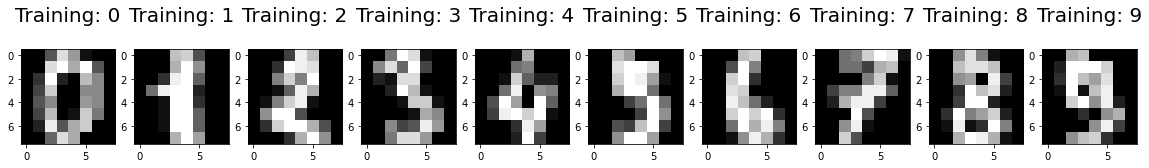

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(40)

plt.figure(figsize=(20,4))
num_images_to_show = 10
for index, (image, label) in enumerate(zip(digits.data[0:num_images_to_show], digits.target[0:num_images_to_show])):
    plt.subplot(1, num_images_to_show, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state = 40)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)
#plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)
#print(y_test[0])

0.9638888888888889


In [ ]:
# CONFUSION MATRIX
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[30  0  0  0  0  0  0  0  0  0]
 [ 0 41  1  0  2  0  0  0  1  2]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  1  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  1]
 [ 0  1  0  0  0  0  1  0 34  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


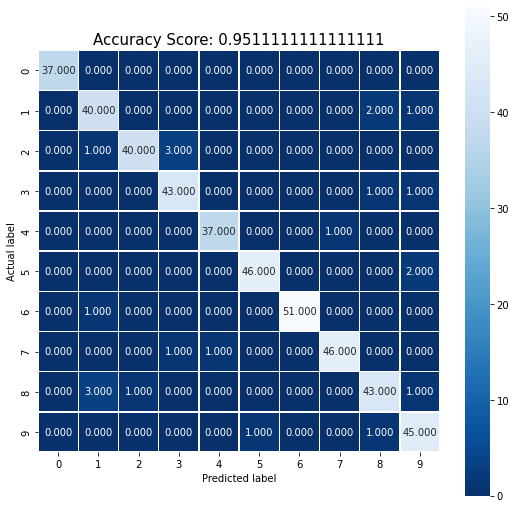

In [ ]:
# If you want to make it look nicer:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);